<a href="https://colab.research.google.com/github/JaschaNi/TechLabs/blob/main/Jan29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10/kaggle-1.5.10-cp36-none-any.whl
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [4]:
# need to be done once
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# need to be done once
# on Kaggle in the Profil go to Edit Profil, then download API Token and upload here, will be saved in Drive then
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b'image_name,patient_id,sex,age_approx,anatom_site_general_challenge\nISIC_0052060,IP_3579794,male,70.0,\nISIC_0052349,IP_7782715,male,40.0,lower extremity\nISIC_0058510,IP_7960270,female,55.0,torso\nISIC_0073313,IP_6375035,female,50.0,torso\nISIC_0073502,IP_0589375,female,45.0,lower extremity\nISIC_0074618,IP_4438996,male,50.0,lower extremity\nISIC_0076801,IP_3110660,male,45.0,upper extremity\nISIC_0077586,IP_8578442,male,50.0,lower extremity\nISIC_0082004,IP_0817448,female,45.0,torso\nISIC_0082785,IP_3634181,male,65.0,lower extremity\nISIC_0085332,IP_7899071,male,40.0,torso\nISIC_0087243,IP_7746230,male,60.0,torso\nISIC_0088167,IP_0581821,female,30.0,upper extremity\nISIC_0089356,IP_8564532,female,65.0,torso\nISIC_0090283,IP_9657527,male,55.0,head/neck\nISIC_0092481,IP_4288676,female,55.0,lower extremity\nISIC_0095455,IP_2849250,female,40.0,lower extremity\nISIC_0095790,IP_9918026,male,65.0,torso\nISIC_0097719,IP_3331830,male,45.0,torso\nISIC_0099348,IP_4403761,female,45

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Dataset to big
#!kaggle competitions download -c siim-isic-melanoma-classification

In [6]:
# found a new dataset which is already resized to 300x300 and 640x640
!kaggle datasets download bitthal/resize-jpg-siimisic-melanoma-classification
!unzip /content/resize-jpg-siimisic-melanoma-classification.zip

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: 640x640/train/ISIC_8512716.jpg  
  inflating: 640x640/train/ISIC_8513112.jpg  
  inflating: 640x640/train/ISIC_8513649.jpg  
  inflating: 640x640/train/ISIC_8514170.jpg  
  inflating: 640x640/train/ISIC_8514989.jpg  
  inflating: 640x640/train/ISIC_8515165.jpg  
  inflating: 640x640/train/ISIC_8515281.jpg  
  inflating: 640x640/train/ISIC_8515582.jpg  
  inflating: 640x640/train/ISIC_8515674.jpg  
  inflating: 640x640/train/ISIC_8516181.jpg  
  inflating: 640x640/train/ISIC_8516223.jpg  
  inflating: 640x640/train/ISIC_8516516.jpg  
  inflating: 640x640/train/ISIC_8516631.jpg  
  inflating: 640x640/train/ISIC_8516659.jpg  
  inflating: 640x640/train/ISIC_8516922.jpg  
  inflating: 640x640/train/ISIC_8517305.jpg  
  inflating: 640x640/train/ISIC_8517492.jpg  
  inflating: 640x640/train/ISIC_8518406.jpg  
  inflating: 640x640/train/ISIC_8519222.jpg  
  inflating: 640x640/train/ISIC_8519402.jpg  
  inflating: 

In [2]:
import numpy as np
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot

In [3]:
img_path = '/content/300x300/train/'

uint8
(300, 300, 3)


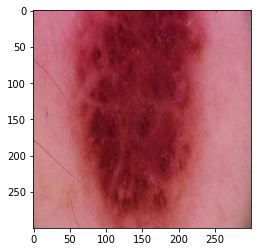

In [4]:
# load image as pixel array
image_test = image.imread(img_path + 'ISIC_9999806.jpg')
# summarize shape of the pixel array
print(image_test.dtype)
print(image_test.shape)
# display the array of pixels as an image
pyplot.imshow(image_test)
pyplot.show()

In [5]:
#!pip install pandas
import pandas as pd

In [6]:
train_csv = pd.read_csv('train.csv')

In [7]:
print(train_csv.head())

     image_name  patient_id     sex  ...  diagnosis benign_malignant target
0  ISIC_2637011  IP_7279968    male  ...    unknown           benign      0
1  ISIC_0015719  IP_3075186  female  ...    unknown           benign      0
2  ISIC_0052212  IP_2842074  female  ...      nevus           benign      0
3  ISIC_0068279  IP_6890425  female  ...    unknown           benign      0
4  ISIC_0074268  IP_8723313  female  ...    unknown           benign      0

[5 rows x 8 columns]


In [15]:
print(train_csv["diagnosis"].unique())

['unknown' 'nevus' 'melanoma' 'seborrheic keratosis' 'lentigo NOS'
 'lichenoid keratosis' 'solar lentigo' 'cafe-au-lait macule'
 'atypical melanocytic proliferation']


In [8]:
import sklearn
from sklearn.model_selection import train_test_split

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
train_csv_clean = train_csv.drop(["patient_id", "benign_malignant"], axis=1)

In [11]:
train_csv_clean.head()
print(len(train_csv_clean))

33126


In [12]:
train_target = train_csv.drop(["image_name", "sex", "age_approx", "anatom_site_general_challenge", "diagnosis", "patient_id", "benign_malignant"], axis=1)

In [21]:
train_target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [13]:
df = pd.DataFrame(columns=("name", "pixel values", "label"))

i = 0

for picture in train_csv_clean["image_name"]:
  try:
    image_test = image.imread(img_path + picture + '.jpg')
    df = df.append({"name":picture, "pixel values":image_test, "label":train_csv_clean["target"][i]}, ignore_index=True)
    i+=1
  except:
    print(picture)
  
print(df.head())
print(len(df))


           name                                       pixel values label
0  ISIC_2637011  [[[179, 138, 142], [181, 139, 143], [194, 152,...     0
1  ISIC_0015719  [[[152, 92, 64], [156, 96, 68], [159, 99, 73],...     0
2  ISIC_0052212  [[[198, 129, 148], [201, 132, 151], [200, 131,...     0
3  ISIC_0068279  [[[100, 49, 46], [122, 68, 66], [112, 56, 55],...     0
4  ISIC_0074268  [[[170, 117, 99], [175, 122, 104], [178, 125, ...     0
33126


In [ ]:
df.to_json('training_data.json')

In [24]:
train = pd.read_json('training_data.json')
print(train.head())
print(len(train))

0    [[[179 138 142]\n  [181 139 143]\n  [194 152 1...
1    [[[152  92  64]\n  [156  96  68]\n  [159  99  ...
2    [[[198 129 148]\n  [201 132 151]\n  [200 131 1...
3    [[[100  49  46]\n  [122  68  66]\n  [112  56  ...
4    [[[170 117  99]\n  [175 122 104]\n  [178 125 1...
Name: pixel values, dtype: object
33126


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
num_classes = 10 #define the number of classes possible.

print('before',y_test[0])

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print('after',y_test[0])

#Normalize
x_train  = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                   tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                  tf.keras.layers.Dense(10, activation=tf.nn.softmax)])